# K-Means Clustering as a Predictive tool for Manufacturing Defect Data

This notebook explores unsupervised learning through K-means clustering to identify patterns in repair costs and product defect groupings.

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import kagglehub

In [37]:

# Load dataset from KaggleHub
path = kagglehub.dataset_download("fahmidachowdhury/manufacturing-defects")
file_path = f"{path}/defects_data.csv"
defects = pd.read_csv(file_path)

print(" Dataset loaded successfully:")
display(defects.head())


 Dataset loaded successfully:


,defect_id,product_id,defect_type,defect_date,defect_location,severity,inspection_method,repair_cost
0,1,15,Structural,6/6/2024,Component,Minor,Visual Inspection,245.47
1,2,6,Functional,4/26/2024,Component,Minor,Visual Inspection,26.87
2,3,84,Structural,2/15/2024,Internal,Minor,Automated Testing,835.81
3,4,10,Functional,3/28/2024,Internal,Critical,Automated Testing,444.47
4,5,14,Cosmetic,4/26/2024,Component,Minor,Manual Testing,823.64


In [38]:
#Standardize the data
# Select numeric columns for scaling
numeric_columns = defects.select_dtypes(include=['number']).columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(defects[numeric_columns])

In [39]:
# Elbow Method for Optimal K and Silhouette Score
# Initialize lists to store inertia and silhouette scores
inertia_scores = []
silhouette_scores = []
ks = list(range(2, 11))

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertia_scores.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

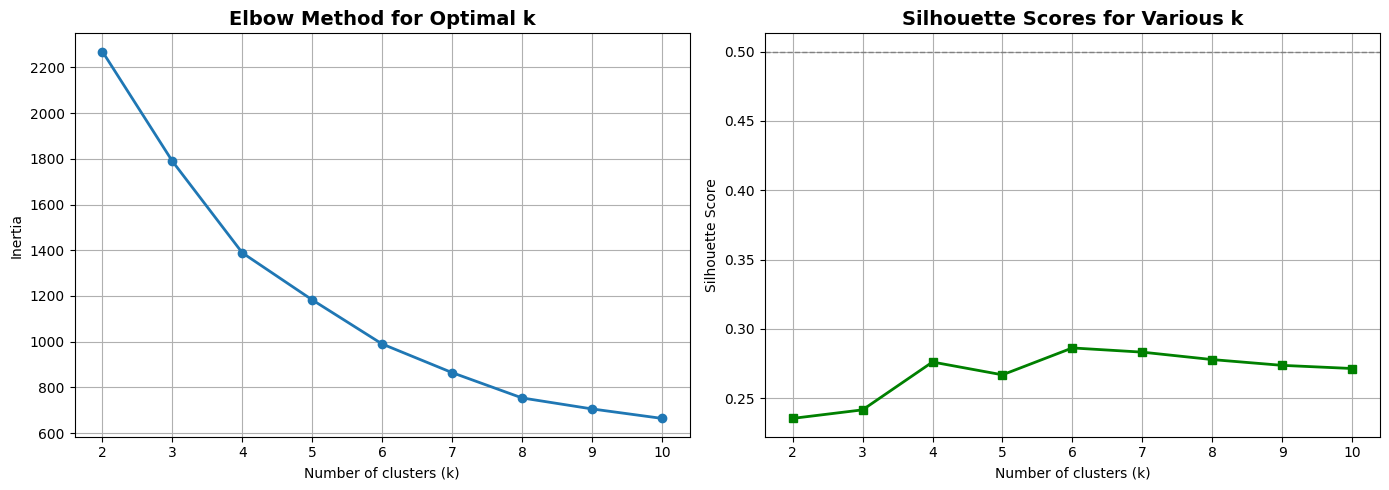

In [40]:
#Plotting the Elbow Method and Silhouette Scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.plot(ks, inertia_scores, marker='o', linewidth=2)
ax1.set_title('Elbow Method for Optimal k', fontsize=14, fontweight='bold')
ax1.set_xlabel('Number of clusters (k)')
ax1.set_ylabel('Inertia')
ax1.grid(True)

ax2.plot(ks, silhouette_scores, marker='s', color='green', linewidth=2)
ax2.set_title('Silhouette Scores for Various k', fontsize=14, fontweight='bold')
ax2.set_xlabel('Number of clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.axhline(y=0.5, color='gray', linestyle='--', linewidth=1)
ax2.grid(True)

plt.tight_layout()
plt.savefig("silhouette_elbow_kmeans.png")
plt.show()

In [ ]:
###### This chart evaluates cohesion and optimal clustering using the Elbow and Silhouette methods. A silhouette score above 0.5 typically indicates well-separated and cohesive clusters. As shown,  delivers minimal cohesion, excluding its use for this model.

In [43]:
#Run KMeans with the optimal number of clusters
# Using the optimal number of clusters (k=3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
labels = kmeans.fit_predict(X_scaled)
defects['Cluster'] = labels

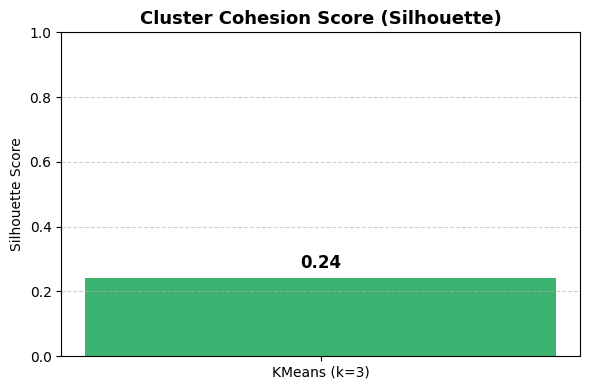

In [44]:
sil_score = silhouette_score(X_scaled, labels)
plt.figure(figsize=(6, 4))
bars = plt.bar(['KMeans (k=3)'], [sil_score], color='mediumseagreen')
plt.ylim(0, 1)
plt.ylabel('Silhouette Score')
plt.title('Cluster Cohesion Score (Silhouette)', fontsize=13, fontweight='bold')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.02, f'{yval:.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("silhouette_score_kmeans.png")
plt.show()

In [47]:
##### 
# #PCA for Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
defects['PCA1'] = X_pca[:, 0]

In [46]:
# Display resulting clusters
defects[['product_id', 'repair_cost', 'Cluster']]

,product_id,repair_cost,Cluster
0,15,245.47,2
1,6,26.87,2
2,84,835.81,2
3,10,444.47,2
4,14,823.64,2
...,...,...,...
995,25,813.14,0
996,23,944.07,0
997,17,401.12,1
998,96,775.63,0


### Interpretation of Clustering Strength

A silhouette score above 0.5 typically indicates that clusters are well-formed and distinct from one another. In this case, the K-means algorithm produced a silhouette score of 0.24, reflecting lack of separation and low internal cohesion among clusters. This suggests that product and defect patterns in the dataset do not lend themselves well to unsupervised grouping, ending its potential as a feature engineering approach in future models.